In [45]:
import pandas as pd 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [46]:
%matplotlib inline

In [47]:
con_dist = pd.read_csv("data_sources/condom_dist_u.csv", 
                       index_col = "Community Area Name")
mchla = pd.read_csv("data_sources/chlamydia_males.csv", 
                    index_col = "Community Area Name")
#read in and label all csv files, make community area name the leftmost column

In [48]:
con_dist_group = con_dist.groupby(["Community Area Name"]).count() #group condom distribution sites csv file by community area
con_dist_group.dropna(inplace = True) #get rid of all blank rows
con_dist_group.rename(columns = {"Name" : "Number_of_Condom_Centers"}, inplace = True) #rename # of condom centers column to be more clear
#con_dist_group.head(5)

In [49]:
con_mchla_merged = con_dist_group.join(mchla) #merge condom distribution centers and male chlamydia datasets
con_mchla_merged.rename(columns = {"Incidence Rate 2013" : "Incidence_Rate_2013"}, inplace = True)
con_mchla_merged.rename(columns = {"Incidence Rate 2014" : "Incidence_Rate_2014"}, inplace = True)
con_mchla_merged.rename(columns = {"CASES 2013 Male 15-44" : "Cases_2013_Male"}, inplace = True)
con_mchla_merged.rename(columns = {"CASES 2014 Male 15-44" : "Cases_2014_Male"}, inplace = True)


con_mchla_merged = con_mchla_merged[['Number_of_Condom_Centers',
                                    "Incidence_Rate_2013",
                                    "Cases_2013_Male",
                                    "Incidence_Rate_2014",
                                    "Cases_2014_Male"]]

con_mchla_merged['Cases_2014_Male'] = con_mchla_merged['Cases_2014_Male'].replace("<5", 0)

con_mchla_merged['Cases_2014_Male'] = con_mchla_merged['Cases_2014_Male'].fillna(0)

con_mchla_merged['Cases_2014_Male'] = con_mchla_merged['Cases_2014_Male'].astype(float)

con_mchla_merged.dtypes

Number_of_Condom_Centers      int64
Incidence_Rate_2013         float64
Cases_2013_Male             float64
Incidence_Rate_2014         float64
Cases_2014_Male             float64
dtype: object

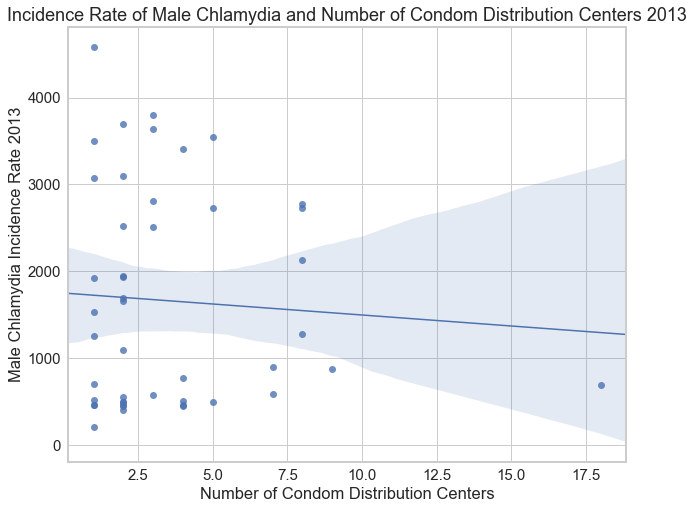

In [50]:
sns.set_style("whitegrid", 
              rc={'axes.linewidth': 2}
             ) #create graph space with seaborn
sns.set_context('notebook', 
                font_scale=1.5, 
                rc={"lines.linewidth": 1, 
                    "figure.figsize" : (10, 8)
                   }
               ) #set up line width and figure size
graph23 = sns.regplot(x = "Number_of_Condom_Centers",
                      y = "Incidence_Rate_2013",
                      data = con_mchla_merged) 

#create scatter plot to show relationship between # of condom sites and STI incidence rate

graph23.set_ylabel("Male Chlamydia Incidence Rate 2013") #fix y axis label

graph23.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph23.set_title("Incidence Rate of Male Chlamydia and Number of Condom Distribution Centers 2013") # add label 

In [51]:
ols = smf.ols(formula = "Incidence_Rate_2013 ~ Number_of_Condom_Centers", data = con_mchla_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2013   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                 -0.018
Method:                  Least Squares   F-statistic:                    0.1863
Date:                 Thu, 30 Nov 2017   Prob (F-statistic):              0.668
Time:                         13:10:36   Log-Likelihood:                -392.32
No. Observations:                   46   AIC:                             788.6
Df Residuals:                       44   BIC:                             792.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1748.3863    276.913      6.314      0.000    1190.305    2306.468
Number_of_Condom_Centers   -25.3066     58.634     -0.432      0.668    -143.475      92.862
==============================================================================
Omnibus:                        7.725   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                4.427
Skew:                           0.568   Prob(JB):                        0.109
Kurtosis:                       1.990   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

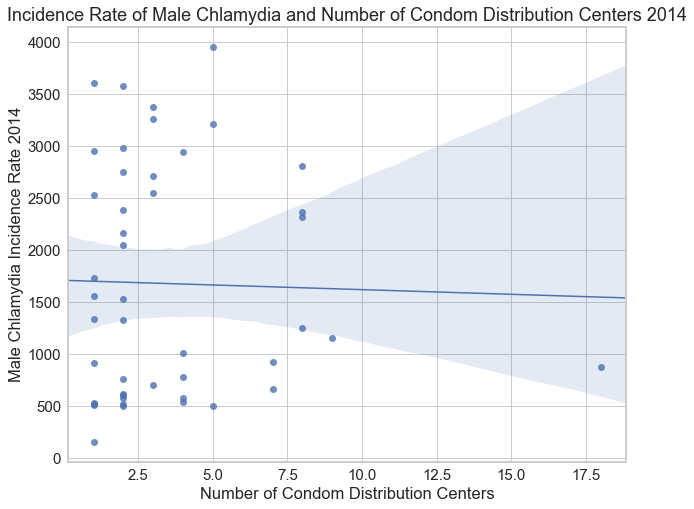

In [52]:
graph24 = sns.regplot(x = "Number_of_Condom_Centers", 
                      y = "Incidence_Rate_2014", 
                      data = con_mchla_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph24.set_ylabel("Male Chlamydia Incidence Rate 2014") #fix y axis label

graph24.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph24.set_title("Incidence Rate of Male Chlamydia and Number of Condom Distribution Centers 2014") # add label 

In [53]:
ols = smf.ols(formula = "Incidence_Rate_2014 ~ Number_of_Condom_Centers", data = con_mchla_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2014   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.022
Method:                  Least Squares   F-statistic:                   0.02935
Date:                 Thu, 30 Nov 2017   Prob (F-statistic):              0.865
Time:                         13:10:37   Log-Likelihood:                -387.11
No. Observations:                   46   AIC:                             778.2
Df Residuals:                       44   BIC:                             781.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1708.8418    247.255      6.911      0.000    1210.532    2207.152
Number_of_Condom_Centers    -8.9693     52.354     -0.171      0.865    -114.482      96.543
==============================================================================
Omnibus:                       13.168   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.251
Skew:                           0.421   Prob(JB):                        0.119
Kurtosis:                       1.772   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

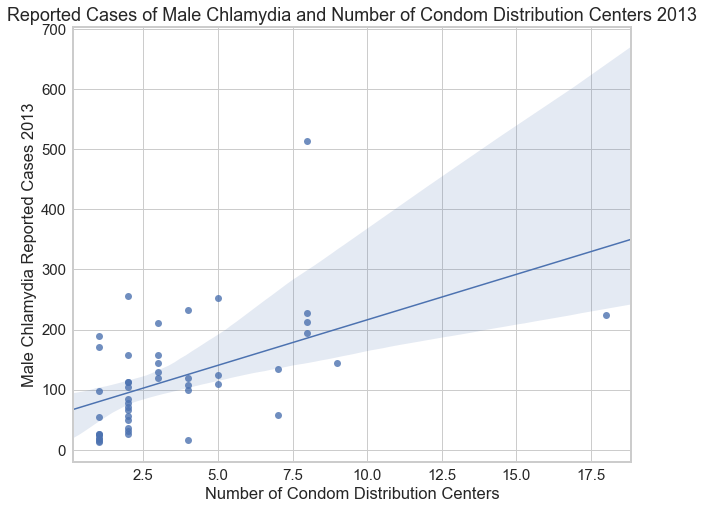

In [54]:
graph25 = sns.regplot(x = "Number_of_Condom_Centers", 
                      y = "Cases_2013_Male", 
                      data = con_mchla_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph25.set_ylabel("Male Chlamydia Reported Cases 2013") #fix y axis label

graph25.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph25.set_title("Reported Cases of Male Chlamydia and Number of Condom Distribution Centers 2013") # add label 

In [55]:
ols = smf.ols(formula = "Cases_2013_Male ~ Number_of_Condom_Centers", data = con_mchla_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Cases_2013_Male   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     16.00
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           0.000239
Time:                        13:10:37   Log-Likelihood:                -266.24
No. Observations:                  46   AIC:                             536.5
Df Residuals:                      44   BIC:                             540.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   64.8686     17.866      3.631      0.001      28.863     100.874
Number_of_Condom_Centers    15.1299      3.783      4.000      0.000       7.506      22.754
==============================================================================
Omnibus:                       28.601   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.330
Skew:                           1.712   Prob(JB):                     2.92e-14
Kurtosis:                       7.561   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

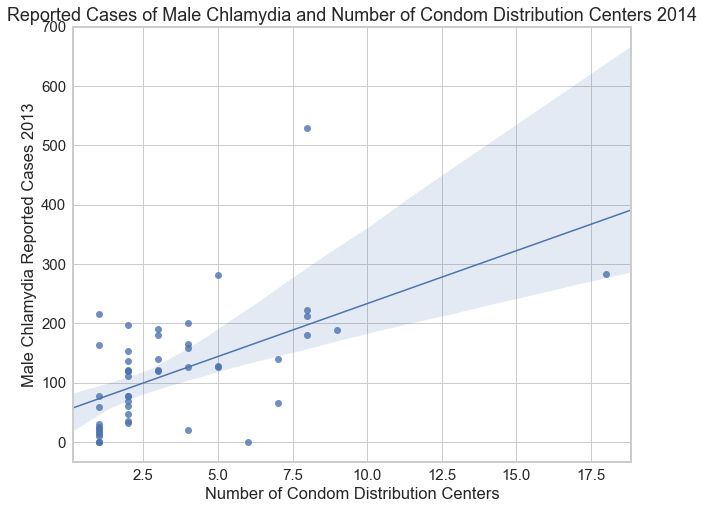

In [56]:
graph26 = sns.regplot(x = "Number_of_Condom_Centers", 
                      y = "Cases_2014_Male", 
                      data = con_mchla_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph26.set_ylabel("Male Chlamydia Reported Cases 2013") #fix y axis label

graph26.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph26.set_title("Reported Cases of Male Chlamydia and Number of Condom Distribution Centers 2014") # add label 

In [57]:
ols = smf.ols(formula = "Cases_2014_Male ~ Number_of_Condom_Centers", data = con_mchla_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Cases_2014_Male   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     23.78
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           1.23e-05
Time:                        13:10:38   Log-Likelihood:                -289.08
No. Observations:                  50   AIC:                             582.2
Df Residuals:                      48   BIC:                             586.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   54.9075     16.868      3.255      0.002      20.992      88.823
Number_of_Condom_Centers    17.8224      3.655      4.876      0.000      10.474      25.171
==============================================================================
Omnibus:                       26.630   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.703
Skew:                           1.460   Prob(JB):                     3.99e-14
Kurtosis:                       7.593   Cond. No.                         7.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
graph23.figure.savefig('graphs/graph23.png')
graph24.figure.savefig('graphs/graph24.png')
graph25.figure.savefig('graphs/graph25.png')
graph26.figure.savefig('graphs/graph26.png')